In [75]:
# MODULE: (2024) 5DATA002W.2 Machine Learning and Data Mining
# Hamza Hassan W2044381
# Python Notebook 2
# Classification and Hyperparameters Tuning

# Key reminder - I changed some varaible names Tumor_Size - Tumor_Load, Survival_Months - Progression_Free_Months, Mortality_Status - Survival_Status
# Sex - Gender, Progesterone_Status - Progesterone_Levels, Estrogen_Status - Estrogen_Levels, Occupation - Profession, Month_Of_Birth - Birth_Month

# My Notebook 2 was reviewed by Riya (W2036372) and Yusuf (W2040640) on 31st March 2025 at 12:16 PM in the Cavendish Library.
# They both gave feedback on the following parts of my Python Notebook 2:

# They checked if my model implementations (Logistic Regression, KNN, and Naive Bayes) were done correctly and followed the expected structure.

# They reviewed how I used evaluation metrics like recall, F1-score, and AUC, and whether they matched the success criteria from the brief.

# They also looked at how I applied cross-validation (GridSearchCV) for my Logistic Regression model to make sure I tuned it properly.


# BEGINNING FROM IMPORTING LIBRAIRES UNTIL FEATURE COLUMNS FOR SURVIVAL STATUS

Code Reuse Session 2 - Step 1 and other key steps in the code reuse - In this section, I imported all the libraries needed for building and evaluating machine learning models. These include tools for data handling (pandas, numpy), model building (like Logistic Regression, KNN, Naive Bayes), model evaluation (accuracy, confusion matrix, classification report), visualizations (matplotlib), and hyperparameter tuning (GridSearchCV).

In [76]:
# Importing all of the required libraries needed for the notebook

import pandas as pd  # I'm using pandas to work with the dataset in table format
from sklearn.model_selection import train_test_split  # To split the data into training and test sets
from sklearn.linear_model import LogisticRegression  # I'm importing Logistic Regression as one of the models
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import numpy as np  # Useful for numerical operations and working with arrays
from sklearn.neighbors import KNeighborsClassifier  # Importing KNN model for classification
from sklearn.naive_bayes import GaussianNB  # Using the Naive Bayes model for comparison
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay  # To evaluate how well the model performs
from sklearn.metrics import classification_report  # Gives a detailed report including precision, recall, and F1 score
from sklearn.metrics import RocCurveDisplay  # To visualize the ROC curve for model performance
from sklearn.model_selection import GridSearchCV  # For tuning model parameters using grid search and cross-validation


Code Reuse Session 2 - Step 2 Loading the Breast Cancer Dataset - This line of code loads the cleaned breast cancer dataset from a CSV file into a pandas DataFrame. By using pd.read_csv(), I’m bringing the data into my notebook so I can start working with it—analyzing patterns, building classification models, and tuning hyperparameters for better prediction accuracy

In [77]:
# Loading the Breast Cancer dataset
patients = pd.read_csv('/content/CleanedBreastCancerDataset (3).csv')

Tutorial 1 Part G Page 37 - Before starting any classification models in Notebook 2, I decided to standardize all the numerical features. Since I’m using Logistic Regression, I know it works better when the input features are on the same scale. This is because it's sensitive to the size and range of the values, and unscaled data can affect how well the model learns. I followed the steps from Tutorial 1 Part G (Page 37), which showed how standardization helps when working with models like Logistic Regression that rely on gradients.

In [78]:
# I’m importing StandardScaler to scale my data. This helps make sure all features have the same scale, which is important for models like KNN or logistic regression.
from sklearn.preprocessing import StandardScaler

# I'm picking only the numeric columns (except Survival_Status) to scale them properly
numeric_cols = patients.select_dtypes(include=['float64', 'int64']).drop(columns=['Survival_Status']).columns

# Setting up StandardScaler to make sure all numeric features are on the same scale
scaler = StandardScaler()

# Applying the scaler to standardize the selected numeric columns
patients[numeric_cols] = scaler.fit_transform(patients[numeric_cols])

Code Reuse Session 2 - Step 3 - Showing a Quick Sample of patients in the dataset to gives a quick snapshot of what the data looks like—kind of like getting an overview before diving deeper. It helps to see if everything is in order and if the columns and rows make sense

In [79]:
# Quickly displaying a Sample of Patients in the Dataset
patients.head(15)

,Age,N_Stage,6th_Stage,Grade,Tumor_Load,Estrogen_Levels,Progesterone_Levels,Progression_Free_Months,Survival_Status
0,1.565163,-0.631481,-1.043469,1.330020,-1.253953,0.267867,0.458123,-0.493087,1
1,-0.445437,0.812623,0.537473,-0.237141,0.215461,0.267867,0.458123,-0.405822,1
2,0.448163,2.256727,2.118415,-0.237141,1.542673,0.267867,0.458123,0.161401,1
3,0.448163,-0.631481,-1.043469,1.330020,-0.590347,0.267867,0.458123,0.554095,1
4,-0.780537,-0.631481,-0.252998,1.330020,0.499863,0.267867,0.458123,-0.929413,1
5,-0.333737,-0.631481,-1.043469,-0.237141,-0.495546,0.267867,0.458123,0.772258,1
6,-0.333737,-0.631481,-1.043469,-1.804302,-1.064351,0.267867,0.458123,-0.754883,1
7,-1.562436,-0.631481,-0.252998,-0.237141,-0.021541,0.267867,0.458123,-2.500186,0
8,-1.562436,2.256727,2.118415,1.330020,3.438690,0.267867,0.458123,-0.056761,1
9,1.676863,2.256727,2.118415,-1.804302,0.073260,0.267867,0.458123,0.903155,1


Code Reuse Session 2 - Step 4 Checking the Datatypes that are in the Breast Cancer Dataset like the number of entries, the column names, and the data types for each column. It's useful for spotting things like missing values or incorrect data types, which can help us know what kind of cleaning or adjustments i need to make before moving forward, or if the cleaning that i done in notebook 1 was done properly its a quick checl

In [80]:
# I'm quickly checking the Datatypes in the Dataset
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4018 non-null   float64
 1   N_Stage                  4018 non-null   float64
 2   6th_Stage                4018 non-null   float64
 3   Grade                    4018 non-null   float64
 4   Tumor_Load               4018 non-null   float64
 5   Estrogen_Levels          4018 non-null   float64
 6   Progesterone_Levels      4018 non-null   float64
 7   Progression_Free_Months  4018 non-null   float64
 8   Survival_Status          4018 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 282.6 KB


Code Reuse Session 2 - Step 5 Setting pandas display options to control the rows and columns in the dataset, by setting the maximum number of rows and columns shown and also the display width for better readibility

In [81]:
# Reusing this (even though its already in notebook 1) to make sure no columns/rows are cut off when viewing data in this notebook
# controlling the rows and columns truncation in the dataset

pd.set_option('display.max_rows', 500)  # Setting the maximum number of rows displayed in the DataFrame output to 500

pd.set_option('display.max_columns', 500) # Setting the maximum number of columns displayed in the DataFrame output to 500

pd.set_option('display.width', 150) # Setting the display width of the DataFrame to 150 characters for better readability

Code Reuse Session 2 – Step 6 (Declaring Input Variables) - Here I’m choosing the input features that I want the model to learn from in order to predict the target, which is Survival Status. This step is important because it tells the model what information to use when learning patterns. These features include things like N Stage, Progesterone levels, Tumor Load, Estrogen Levels, Age and Progression Free Months. All of which could affect survival. This is the first step in preparing the data for training the classification models.

In [82]:
# I'm selecting the features I want to use for classification
feature_cols = ['N_Stage','Progesterone_Levels', 'Tumor_Load','Estrogen_Levels', 'Age', 'Progression_Free_Months']

# Setting X as the input features
X = patients[feature_cols]

# Setting y as the target variable I'm trying to predict, which is Survival Status (Alive or Dead)
y = patients['Survival_Status']

Code Reuse Session 2 – Step 8 (Splitting the Dataset)
In this step, I split my dataset into training and test sets using an 80/20 split. I chose this ratio because it gives the model enough data to learn from while still keeping a good portion aside for testing how well it performs. I also used stratify=y so that the Survival_Status classes (Alive and Dead) are balanced in both the training and test sets. This helps avoid bias and makes sure both sets represent the original class distribution fairly, which is really important in medical data like this.

In [83]:
# Splitting the dataset into a Train-test split (80/20) with stratify to keep Alive/Dead balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the class distribution in both training and test sets
print("Train set class ratio:", y_train.value_counts(normalize=True))
print("Test set class ratio:", y_test.value_counts(normalize=True))

Train set class ratio: Survival_Status
1    0.84692
0    0.15308
Name: proportion, dtype: float64
Test set class ratio: Survival_Status
1    0.847015
0    0.152985
Name: proportion, dtype: float64


# LOGISTIC REGRESSION MODELLING

Code Reuse Session 2 - Step 25 and Step 11 - Here I’m using GridSearchCV to tune my Logistic Regression model. I set up a grid of different values for things like regularisation strength (C), penalty types, solver options, and class weights to handle imbalance. GridSearch tries all the combinations using 5-fold cross-validation and scores them using weighted F1-score. This helps me find the best version of the model that performs well and handles my dataset properly. After it finishes, I print out the best parameters it found.

In [84]:
# Hyperparameter Tuning for the Logistic Regression Model
param_grid_lr = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# I'm setting up GridSearchCV to tune the logistic regression model with cross-validation
lr_gscv = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='f1_weighted'
)

# I'm training the logistic regression model with the training data (Code Reuse Session Step 11)
lr_gscv.fit(X_train, y_train)

# Printing the best hyperparameters that were found
print("Logistic Regression Best Parameters:",lr_gscv.best_params_)

Logistic Regression Best Parameters: {'C': np.float64(1.0), 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}


Code Reuse Session 2 – Step 25 (Best Hyperparameter Model from GridSearchCV)
In this step, I’m using this line to grab the best Logistic Regression model found during the grid search. The best_lr variable now stores the model with the best combination of hyperparameters, based on cross-validation. I’ll use this version to make predictions and test how well it performs on the unseen test data.

In [85]:
best_lr = lr_gscv.best_estimator_ # I'm Saving the best version of the Logistic Regression model found by GridSearch so I can use it to make predictions

Code Reuse Session - Step 12 - I'm using this line to make predictions with the best model (best_lr) that I found earlier. By calling .predict(X_test), it uses the model to predict the outcomes for the test data (X_test). The predictions are then stored in y_pred_lr.

In [86]:
y_pred_lr = best_lr.predict(X_test) # I'm using the best logistic regression model to predict the labels for the test data

Code Reuse Session 2 - Step 14 I created a comparison_df to compare the actual survival statuses (y_test) with the predicted ones (y_pred). This way, I can easily see how well the model did by looking at the differences between what it predicted and the real values. Printing this DataFrame helps me get a clear overview of how accurate the model's predictions are on the test data.

In [87]:
#Comparing the actual vs predicted of patients
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print(comparison_df)

      Actual  Predicted
3949       1          1
197        1          1
3243       0          1
2049       1          1
3241       1          1
...      ...        ...
1739       1          1
106        0          0
3919       1          1
2698       1          1
1984       1          1

[804 rows x 2 columns]


Code Reuse Step 12 - Here I’m using my best Logistic Regression model to make predictions on the training data. This helps me check how well the model learned from the patients it was trained on. I’ll later compare these predictions with the actual labels to measure the training accuracy and see if the model might be overfitting.

In [88]:
y_train_lr = best_lr.predict(X_train)  # I'm predicting the labels for my training data using the best logistic regression model

Code Reuse Session 2 – Step 15 & 16 Code Reuse Session 2 – Step 16
I’m checking how accurate my Logistic Regression model is on both the training and test sets. This helps me see if the model is overfitting or underfitting. High training accuracy but low test accuracy could mean overfitting, while similar scores would show that the model generalises well to new patient data.

In [89]:
# Checking Accuracy Scores of classification

print("Logistic Regression Training Accuracy:", accuracy_score(y_train, y_train_lr))  # here I'm checking how well my LR model did on the training data

print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))  # and here I'm checking how well my LR model performs on unseen test data

Logistic Regression Training Accuracy: 0.8892345986309894
Logistic Regression Test Accuracy: 0.9054726368159204


Code Reuse Session 2 – Step 17 This code creates and shows the confusion matrix for my Logistic Regression model. It helps me compare the predicted survival status with the actual labels from the test set. This makes it easier to see where the model is making correct and incorrect predictions, especially for the Alive and Dead classes. I also added a title so it’s clear which model this matrix belongs to when shown in the report.

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

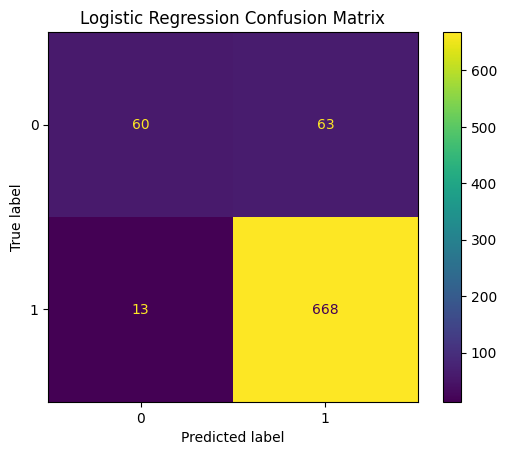

In [90]:
# Generating the confusion matrix to evaluate how well the model classified the test data
cm = confusion_matrix(y_test, y_pred_lr, labels=best_lr.classes_)

# Creating a visual display of the confusion matrix with actual class labels
disp = ConfusionMatrixDisplay(cm, display_labels=best_lr.classes_)

disp.plot()  # Plotting the confusion matrix to visually compare predicted vs actual values

plt.title("Logistic Regression Confusion Matrix")  # Adding a title for clearer understanding of the plot

Code Reuse Session 2 - Step 18 Displaying the Classificaton Report for Logistic Regression to get a detailed breakdown of the model's performance on the test data. It shows metrics like precision, recall, and F1-score, giving me a clearer idea of how well the model is handling both classes (survived vs. not survived).

In [91]:
#Classification Report for LR

print("Tuned Logistic Regression Classification Report:")  # I'm printing a label just for readilbiltiy for the Logristic Regression model's performance

print(classification_report(y_test, y_pred_lr)) # I'm displaying the detailed classification report for the tuned Logistic Regression Model on the test data

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.49      0.61       123
           1       0.91      0.98      0.95       681

    accuracy                           0.91       804
   macro avg       0.87      0.73      0.78       804
weighted avg       0.90      0.91      0.90       804



Code Reuse Session 2 – Step 19 - Here I plot the ROC curve for my Logistic Regression model to visually assess its ability to separate the two classes. The closer the curve gets to the top-left corner, the better the model’s performance

Text(0.5, 1.0, 'ROC Curve (Logistic Regression)')

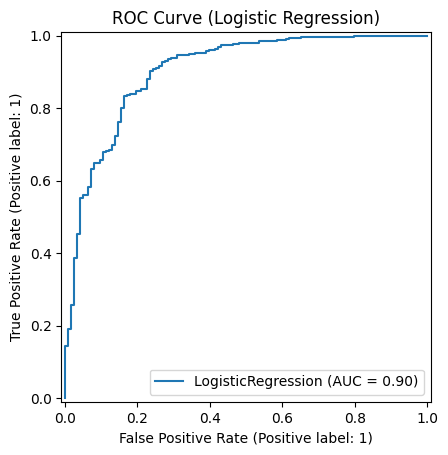

In [92]:
#Step 19 Adding ROC Curve and Displaying for the Logistic Regression to evaluate the model's class discrimination
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)

plt.title("ROC Curve (Logistic Regression)") # Making a title for the Roc Curve for readibility and clarity

# K-NEAREST NEIGHBORS MODELLING

Code Reuse Session 2 - Step 21,22,23 -(Declaring the KNN Model) I'm declaring the KNN (K-Nearest Neighbors) model with n_neighbors=5, meaning it will consider the 5 nearest data points to make predictions. Then, I'm training the model using the fit() method on the training data (X_train, y_train), so the model can learn from the patterns in the data and be ready to make predictions After that, I use the trained KNN model to predict the survival status for the test set, helping me see how well it performs on new patient data.

In [93]:
knn = KNeighborsClassifier(n_neighbors=12)  # I'm setting up my KNN model to use 12 nearest neighbours when making predictions

knn.fit(X_train, y_train) # I'm training the model using my training data so it can learn how features relate to survival status

y_pred_knn = knn.predict(X_test) # Now I'm using the trained KNN model to predict the survival status on the test set

Code Reuse Session 2 - Step 18 Displaying the Classificaton Report for k-nearest neighbor to get a detailed breakdown of the model's performance on the test data. It shows metrics like precision, recall, and F1-score, giving me a clearer idea of how well the model is handling both classes (survived vs. not survived).

In [94]:
# Classification Report for KNN

print("KNN Classification Report") # I'm printing a label just for readilbiltiy for the KNN model's performance

print(classification_report(y_test, y_pred_knn))  # I'm displaying the detailed classification report for the tuned KNN on the test data

KNN Classification Report
              precision    recall  f1-score   support

           0       0.80      0.54      0.65       123
           1       0.92      0.98      0.95       681

    accuracy                           0.91       804
   macro avg       0.86      0.76      0.80       804
weighted avg       0.90      0.91      0.90       804



Code Reuse Session 2 Step 17 (Confusion Matrix for KNN) I used this to show how well my KNN model is doing on the test data. The confusion matrix lets me see which classes the model is getting right and where it's making mistakes. It helps me understand the accuracy of my predictions better.

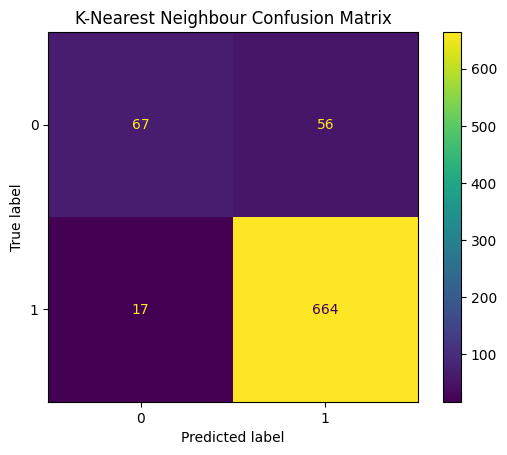

In [95]:
# This line creates and displays a confusion matrix using the KNN model on the test data.
# It helps visualize how well the model is classifying each class by comparing predictions with actual labels.

cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
disp.plot()
disp.ax_.set_title("K-Nearest Neighbour Confusion Matrix")
plt.show()

Code Reuse Session 2 - Step 19 (Displaying the AUC-ROC for the KNN) This line generates and displays the ROC curve for my KNN model using the test data. The ROC curve helps me visualise how well the model can distinguish between classes, with the area under the curve showing its overall performance

Text(0.5, 1.0, 'K-nearest Neighbour AUC-ROC Curve')

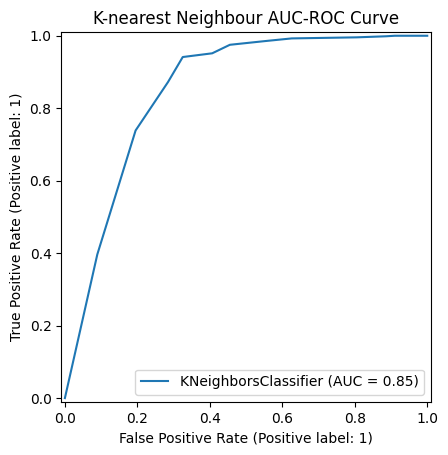

In [96]:
RocCurveDisplay.from_estimator(knn, X_test, y_test) # I'm displaying the ROC curve to evaluate my KNN model's performance

plt.title("K-nearest Neighbour AUC-ROC Curve")  # Setting a title for readility and clarity

Code Reuse session 2 - Step 18 (Making Relevant Predictions on the training data) - This line makes predictions on my training data using the KNN model. I need these predictions to check how well the model learned from the training set

In [97]:
y_train_knn = knn.predict(X_train)  # heres its predicting on the training data

Code Reuse Session steps 15 and 16 - Printing both the training and test accuracy of my KNN model - These two lines show how accurate my KNN model is on the training data and on the test data. This helps me see if my model is just memorizing the training data or if it actually performs well on new, unseen data.

In [98]:
# These lines print the accuracy of the KNN model on both training and test data.

print("KNN Training Accuracy:", accuracy_score(y_train, y_train_knn))  # here I'm checking how well my KNN model did on the training data


print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))  # and here I'm checking how well my KNN model performs on unseen test data

KNN Training Accuracy: 0.8985687616677038
KNN Test Accuracy: 0.9092039800995025


# NAIVE BAYES MODELLING

Code Reuse Session 2 - Step 27 I'm declaring a Gaussian Naive Bayes model (nb) and training it using the fit() method on the training data (X_train, y_train). The Naive Bayes model is based on the assumption that the features follow a Gaussian (normal) distribution, and it learns the relationship between the features and the target variable so it can make predictions.

In [99]:
# I'm creating a Naive Bayes model using the default GaussianNB class.
nb = GaussianNB()

# I'm training (fitting) my Naive Bayes model on the training data so it can learn from the patterns.
nb.fit(X_train, y_train)

GaussianNB()

Code Reuse Session 2 step 13 - (Making predictions for test data) This line uses the Naive Bayes model to predict the labels for my test data. I’m doing this to see how well my model performs on new, unseen data

In [100]:
y_pred_nb = nb.predict(X_test) # I'm using my Naive Bayes model to predict the test data

Code Reuse Session Step 12 (Predictions on training data) This line makes predictions on the training data using my Naive Bayes model. I want to check how well the model learned from the training set before testing it on new data.

In [101]:
y_train_nb = nb.predict(X_train) # Predicting training labels with Naive Bayes

Code Reuse Session steps 15 and 16 - Printing both the training and test accuracy of my Naives Bayes model - These two lines show how accurate my Naive bayes model is on the training data and on the test data. This helps me see if my model is just memorizing the training data or if it actually performs well on new, unseen data.

In [102]:
# These lines print the accuracy of the Naives Bayes model on both training and test data.

print("Naive Bayes Training Accuracy:", accuracy_score(y_train, y_train_nb))  # here I'm checking how well my NB model did on the training data

print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb)) # and here I'm checking how well my NB model performs on unseen test data

Naive Bayes Training Accuracy: 0.8500311138767891
Naive Bayes Test Accuracy: 0.8644278606965174


Code Reuse Session 2 - Step 18 Displaying the Classificaton Report for Naives Bayes to get a detailed breakdown of the model's performance on the test data. It shows metrics like precision, recall, and F1-score, giving me a clearer idea of how well the model is handling both classes (survived vs. Deceased).

In [103]:
# Classification Report for NB

print("Naives Bayes Model's  Classification Report") # I'm printing a label just for readilbiltiy for the Naive Bayes model's performance

print(classification_report(y_test, y_pred_nb)) # I'm displaying the detailed classification report for the Naives Bayes on the test data

Naives Bayes Model's  Classification Report
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       123
           1       0.91      0.93      0.92       681

    accuracy                           0.86       804
   macro avg       0.74      0.72      0.73       804
weighted avg       0.86      0.86      0.86       804



Code Reuse Session 2 Step 17 (Confusion Matrix for Naives Bayes) I used this to check how my Naive Bayes model is performing on the test set. The confusion matrix helps me see where the model is making correct predictions and where it's getting confused. It gives me a clear picture of its accuracy.

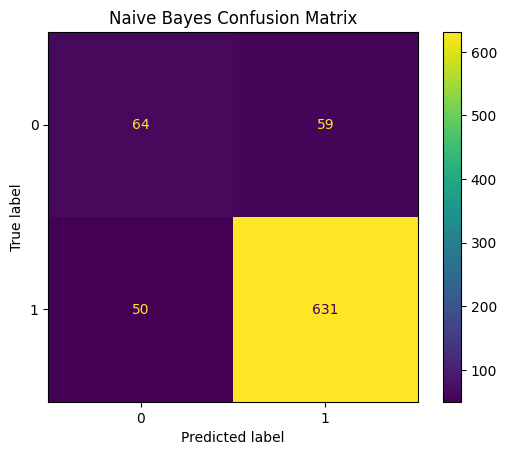

In [104]:
# This line shows the confusion matrix for my Naive Bayes model using the test data.
# It helps me see how well the model is predicting each class by comparing actual vs predicted labels.
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=nb.classes_)
disp.plot()
disp.ax_.set_title("Naive Bayes Confusion Matrix")
plt.show()

Code Reuse Session 2 - Step 19 (Displaying the AUC-ROC for my Naive bayes Model) This line generates and displays the ROC curve for my NB model using the test data. The ROC curve helps me visualise how well the model can distinguish between classes, with the area under the curve showing its overall performance.

Text(0.5, 1.0, 'Naive Bayes AUC-ROC Curve')

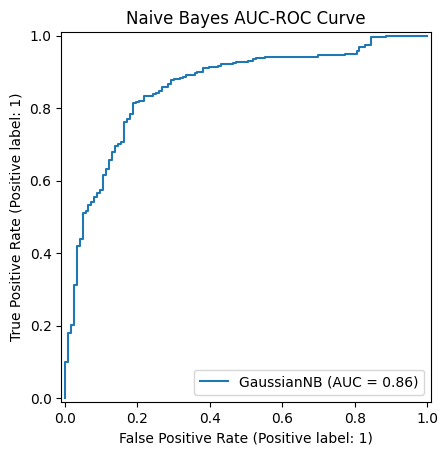

In [105]:
RocCurveDisplay.from_estimator(nb, X_test, y_test)  # I'm displaying the ROC curve to evaluate my Naives Bayes model's performance
plt.title("Naive Bayes AUC-ROC Curve")  # Setting a Title for Readility (Also for the report)